In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

#### Bildinformationen plus Einlesung

Bildbreite: 640
Bildhöhe: 480
--------------------------------
Helligkeit: 
184.75671006944444


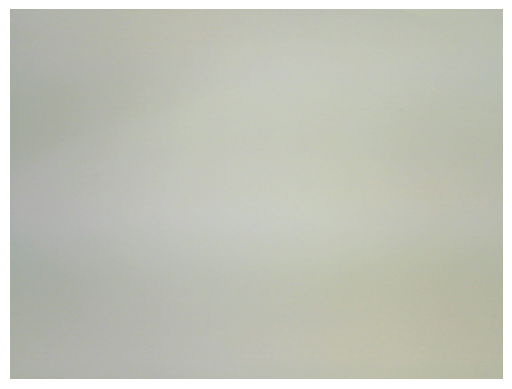

In [39]:
image = cv2.imread('weiss/Weiss1.png', cv2.COLOR_BGR2GRAY)

if image is None:
    print("Das Bild konnte nicht geladen werden. Stellen Sie sicher, dass die Datei existiert und der Pfad korrekt ist.")
else:
    print("Bildbreite: " + str(image.shape[1]))  # Breite des Bildes
    print("Bildhöhe: " + str(image.shape[0]))   # Höhe des Bildes
    print("--------------------------------")
    print("Helligkeit: ")  # Helligkeit des ersten Pixels (Blau-Kanal)
    print(image.mean())

    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Deaktivieren der Achsen
    plt.show()


#### Grauwertstufen als Unterbilder aus dem Originalbild einlesen (Paint.net)

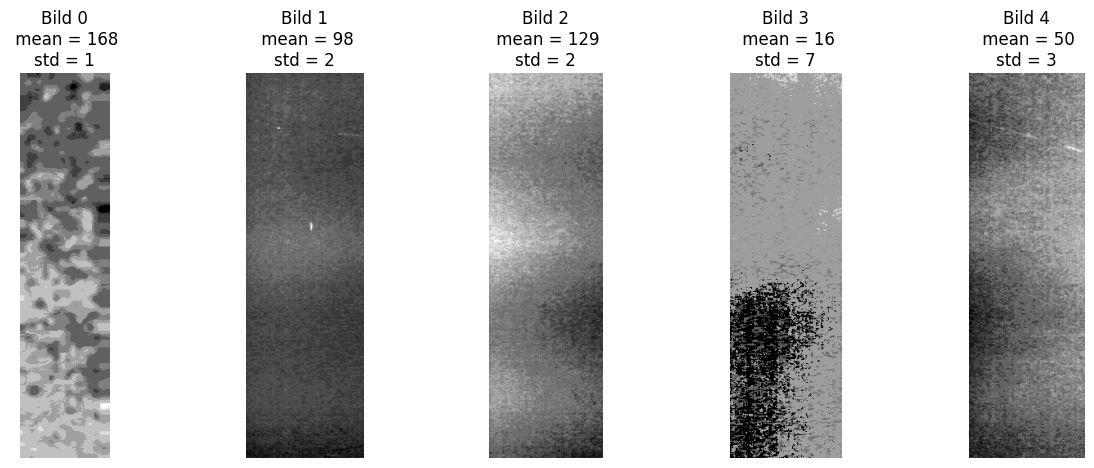

In [40]:
dateien = glob.glob('./grau/*.png')

plt.figure(figsize=(15, 5))

for idx, datei in enumerate(dateien):
    image = cv2.imread(datei, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f'Bild {idx} konnte nicht geladen werden: {datei}')
    else:
        # Erstelle einen Subplot für jedes Bild
        plt.subplot(1, len(dateien), idx + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Bild {idx}\n mean = {int(image.mean())}\nstd = {int(image.std())}')
        plt.axis('off')

plt.show()


#### Aufgabe2: Pixelweiser Mittelwert + Am ende in ein Bild zusammenfügen. Plus korrigiertes Bild 

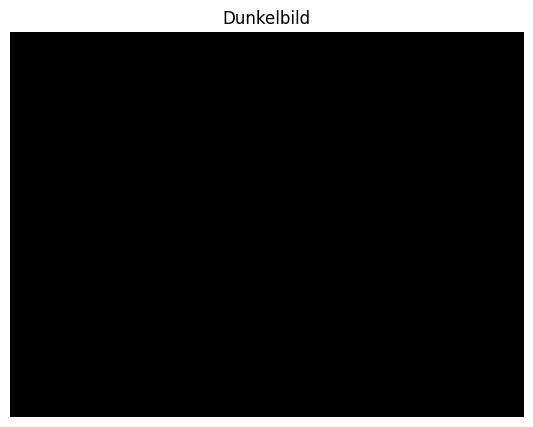

In [41]:
dateien = glob.glob('./schwarz/*.png')

# Sortieren der Dateien, um sicherzustellen, dass sie in der richtigen Reihenfolge geladen werden
dateien.sort()

# Bilderliste initialisieren
images = []

# Jedes Bild laden und zur Liste hinzufügen
for idx, datei in enumerate(dateien):
    image = cv2.imread(datei, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f'Bild {idx+1} konnte nicht geladen werden: {datei}')
        continue
    images.append(image.astype(np.float64))  # Konvertieren zu double

# Pixelweisen Mittelwert über alle Bilder berechnen, um das Dunkelbild zu erhalten
dark_image = np.mean(images, axis=0)

cv2.imwrite('schwarzbild.png', dark_image)

# Kontrastmaximierung des Dunkelbildes
min_value = np.min(dark_image)
max_value = np.max(dark_image)
kontrastmaximiertes_bild = 255 * (dark_image - min_value) / (max_value - min_value)
kontrastmaximiertes_bild = kontrastmaximiertes_bild.astype(np.uint8)

# Dunkelbild kontrastmaximiert darstellen
plt.figure(figsize=(15, 5))
plt.imshow(kontrastmaximiertes_bild, cmap='gray')
plt.axis('off')
plt.title('Kontrastmaximiertes Dunkelbild')
plt.show()

#### AUfgabe 3: Weißbilder plus Mittelwert deren, Danach minus Darkimage von gerade eben

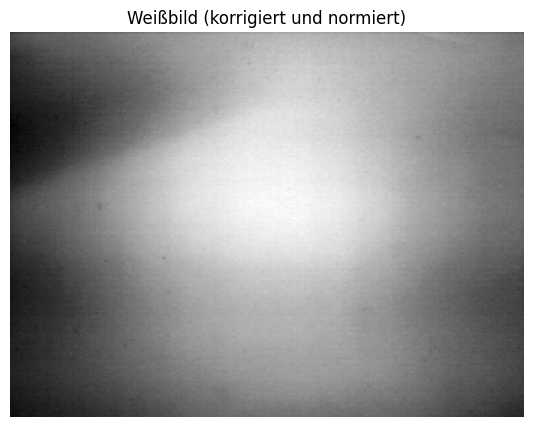

True

In [42]:
# Muster für die Weißbilddateien
weiss_dateien = glob.glob('./weiss/*.png')

# sortieren für richtige reihenfolge
weiss_dateien.sort()

# Liste für die Weißbilder initialisieren
weiss_images = []

# Jedes Weißbild laden und zur Liste hinzufügen
for datei in weiss_dateien:
    image = cv2.imread(datei, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f'Datei konnte nicht geladen werden: {datei}')
        continue
    weiss_images.append(image.astype(np.float64))  # Konvertieren in double

# Pixelweisen Mittelwert über alle Weißbilder berechnen
weiss_image_mean = np.mean(weiss_images, axis=0)

# Vom Mittelwertbild das Dunkelbild subtrahieren
weiss_image_corrected = cv2.subtract(weiss_image_mean, dark_image)

# Das korrigierte Weißbild normieren, so dass sein Mittelwert 1 ist
weiss_image_normalized = weiss_image_corrected / np.mean(weiss_image_corrected)

# Weißbild speichern
cv2.imwrite('weissbild_korrigiert.png', weiss_image_normalized)

# Kontrastmaximierung des Weißbildes
min_value = np.min(weissbild_korrigiert)
max_value = np.max(weissbild_korrigiert)
kontrastmaximiertes_weissbild = 255 * (weissbild_korrigiert - min_value) / (max_value - min_value)
kontrastmaximiertes_weissbild = kontrastmaximiertes_weissbild.astype(np.uint8)

# Weißbild anzeigen
plt.figure(figsize=(15, 5))
plt.imshow(kontrastmaximiertes_weissbild, cmap='gray')
plt.axis('off')
plt.title('Kontrastmaximiertes Weißbild')
plt.show()

In [ ]:
def korrigiere_bild_mit_weissbild(eingabebild_pfad, weissbild_pfad, dunkelbild_pfad, korrigiertes_bild_pfad):
    # Eingabebild, Weißbild und Dunkelbild einlesen
    eingabebild = cv2.imread(eingabebild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)
    weissbild = cv2.imread(weissbild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)
    dunkelbild = cv2.imread(dunkelbild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)

    # Normierung des Weißbildes
    weissbild /= np.mean(weissbild)

    # Korrektur des Eingabebildes
    eingabebild_korrigiert = (eingabebild - dunkelbild) / weissbild

    # Umwandlung in uint8 für die Speicherung
    eingabebild_korrigiert_uint8 = np.clip(eingabebild_korrigiert, 0, 255).astype(np.uint8)

    # Korrigiertes Bild speichern
    cv2.imwrite(korrigiertes_bild_pfad, eingabebild_korrigiert_uint8)


#### Aufgabe 4: Korrigieren des Keils plus Korrigierte Tabelle

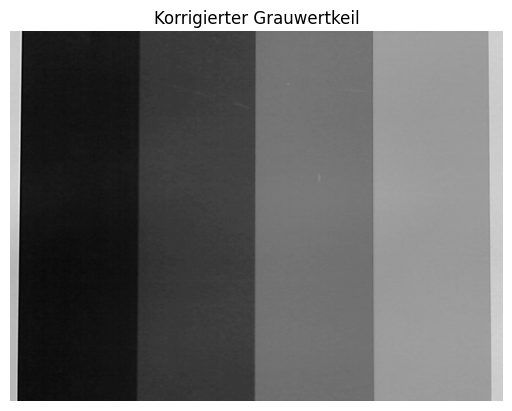

In [43]:
grauwertkeil_pfad = './SchwarzWeiss.png'
dunkelbild_pfad = './schwarzbild.png'
weissbild_pfad = './weissbild_korrigiert.png'

# Bilder laden
grauwertkeil = cv2.imread(grauwertkeil_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)
dunkelbild = cv2.imread(dunkelbild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)
weissbild = cv2.imread(weissbild_pfad, cv2.IMREAD_GRAYSCALE).astype(np.float64)

# Identifiziere fehlerhafte Pixel im Weißbild (Dead Pixels)
dead_pixels = np.where(weissbild < 10)

# Identifiziere fehlerhafte Pixel im Dunkelbild (Stuck und Hot Pixels)
stuck_hot_pixels = np.where(dunkelbild > 245)

# Erstelle eine Kopie des Grauwertkeils zur Markierung der fehlerhaften Pixel
markiertes_grauwertkeil = grauwertkeil.copy()

# Markiere die fehlerhaften Pixel
for x, y in zip(*dead_pixels):
    markiertes_grauwertkeil[x, y] = 255

for x, y in zip(*stuck_hot_pixels):
    markiertes_grauwertkeil[x, y] = 255

# Zeige das markierte Bild
plt.figure(figsize=(10, 10))
plt.imshow(markiertes_grauwertkeil, cmap='gray')
plt.axis('off')
plt.title('Markierte Dead, Stuck und Hot Pixels')
plt.show()

In [ ]:

# Korrigiere Dead Pixels im grauwertkeil
for x, y in zip(*dead_pixels):
    nachbarn = grauwertkeil[max(x-1,0):min(x+2,grauwertkeil.shape[0]), max(y-1,0):min(y+2,grauwertkeil.shape[1])]
    grauwertkeil[x, y] = np.median(nachbarn[nachbarn != grauwertkeil[x, y]])

# Korrigiere Stuck und Hot Pixels im grauwertkeil
for x, y in zip(*stuck_hot_pixels):
    nachbarn = grauwertkeil[max(x-1,0):min(x+2,grauwertkeil.shape[0]), max(y-1,0):min(y+2,grauwertkeil.shape[1])]
    grauwertkeil[x, y] = np.median(nachbarn[nachbarn != grauwertkeil[x, y]])

# Speichere das korrigierte grauwertkeil
cv2.imwrite('grauwertkeil_pixelkorrigiert.png', grauwertkeil)

# korrigiere den keil mit aufgabe 3
korrigiere_bild_mit_weissbild('./grauwertkeil_pixelkorrigiert.png', weissbild_pfad, dunkelbild_pfad, './grauwertkeil_final.png')

grauwertkeilfinal = cv2.imread('grauwertkeil_final.png', cv2.IMREAD_GRAYSCALE)

# Zeige das korrigierte grauwertkeil an
plt.figure(figsize=(10, 10))
plt.imshow(grauwertkeil_final, cmap='gray')
plt.axis('off')
plt.title('Endgültig korrigiertes Grauwertkeil')
plt.show()

In [44]:
# Angenommen, wir kennen die Anzahl der Stufen und ihre Position im Bild
anzahl_stufen = 4
stufen_hoehe = grauwertkeil_korrigiert.shape[0] // anzahl_stufen

# Datenstruktur für die Ergebnisse
mittelwerte = []
standardabweichungen = []
# Bild laden

# Tabelle für die Ergebnisse erstellen
ergebnisse = np.zeros((anzahl_stufen, 2))  # Spalten für Mittelwert und Standardabweichung

# Jede Stufe analysieren
for i in range(anzahl_stufen):
    stufenbereich = korrigiertes_bild[i*stufen_hoehe:(i+1)*stufen_hoehe, :]
    mittelwert = np.mean(stufenbereich)
    standardabweichung = np.std(stufenbereich)
    ergebnisse[i] = [mittelwert, standardabweichung]

# Ergebnisse ausgeben
for stufe, (mittelwert, standardabweichung) in enumerate(ergebnisse):
    print(f"Stufe {stufe+1}: Mittelwert = {mittelwert:.2f}, Standardabweichung = {standardabweichung:.2f}")

Stufe 1: Mittelwert = 0.1079, Standardabweichung = 0.1567
Stufe 2: Mittelwert = 0.1902, Standardabweichung = 0.0319
Stufe 3: Mittelwert = 0.3825, Standardabweichung = 0.0294
Stufe 4: Mittelwert = 0.5221, Standardabweichung = 0.0490
